# Decision Trees

In [1]:
from sklearn.datasets import load_iris

In [2]:
iris = load_iris()

In [4]:
X = iris.data

In [6]:
y = iris.target


In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2)

In [12]:
from sklearn.tree import DecisionTreeClassifier

In [13]:
model  = DecisionTreeClassifier()

In [14]:
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [15]:
pred = model.predict(X_test)

In [16]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, pred)

0.9666666666666667

In [17]:
from sklearn.tree import plot_tree

[Text(0.4, 0.9166666666666666, 'x[2] <= 2.45\ngini = 0.667\nsamples = 120\nvalue = [40, 40, 40]'),
 Text(0.3, 0.75, 'gini = 0.0\nsamples = 40\nvalue = [40, 0, 0]'),
 Text(0.5, 0.75, 'x[3] <= 1.65\ngini = 0.5\nsamples = 80\nvalue = [0, 40, 40]'),
 Text(0.2, 0.5833333333333334, 'x[2] <= 4.95\ngini = 0.133\nsamples = 42\nvalue = [0, 39, 3]'),
 Text(0.1, 0.4166666666666667, 'gini = 0.0\nsamples = 38\nvalue = [0, 38, 0]'),
 Text(0.3, 0.4166666666666667, 'x[3] <= 1.55\ngini = 0.375\nsamples = 4\nvalue = [0, 1, 3]'),
 Text(0.2, 0.25, 'gini = 0.0\nsamples = 2\nvalue = [0, 0, 2]'),
 Text(0.4, 0.25, 'x[1] <= 2.85\ngini = 0.5\nsamples = 2\nvalue = [0, 1, 1]'),
 Text(0.3, 0.08333333333333333, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(0.5, 0.08333333333333333, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.8, 0.5833333333333334, 'x[2] <= 4.85\ngini = 0.051\nsamples = 38\nvalue = [0, 1, 37]'),
 Text(0.7, 0.4166666666666667, 'x[1] <= 3.1\ngini = 0.375\nsamples = 4\nvalue = [0, 1, 3

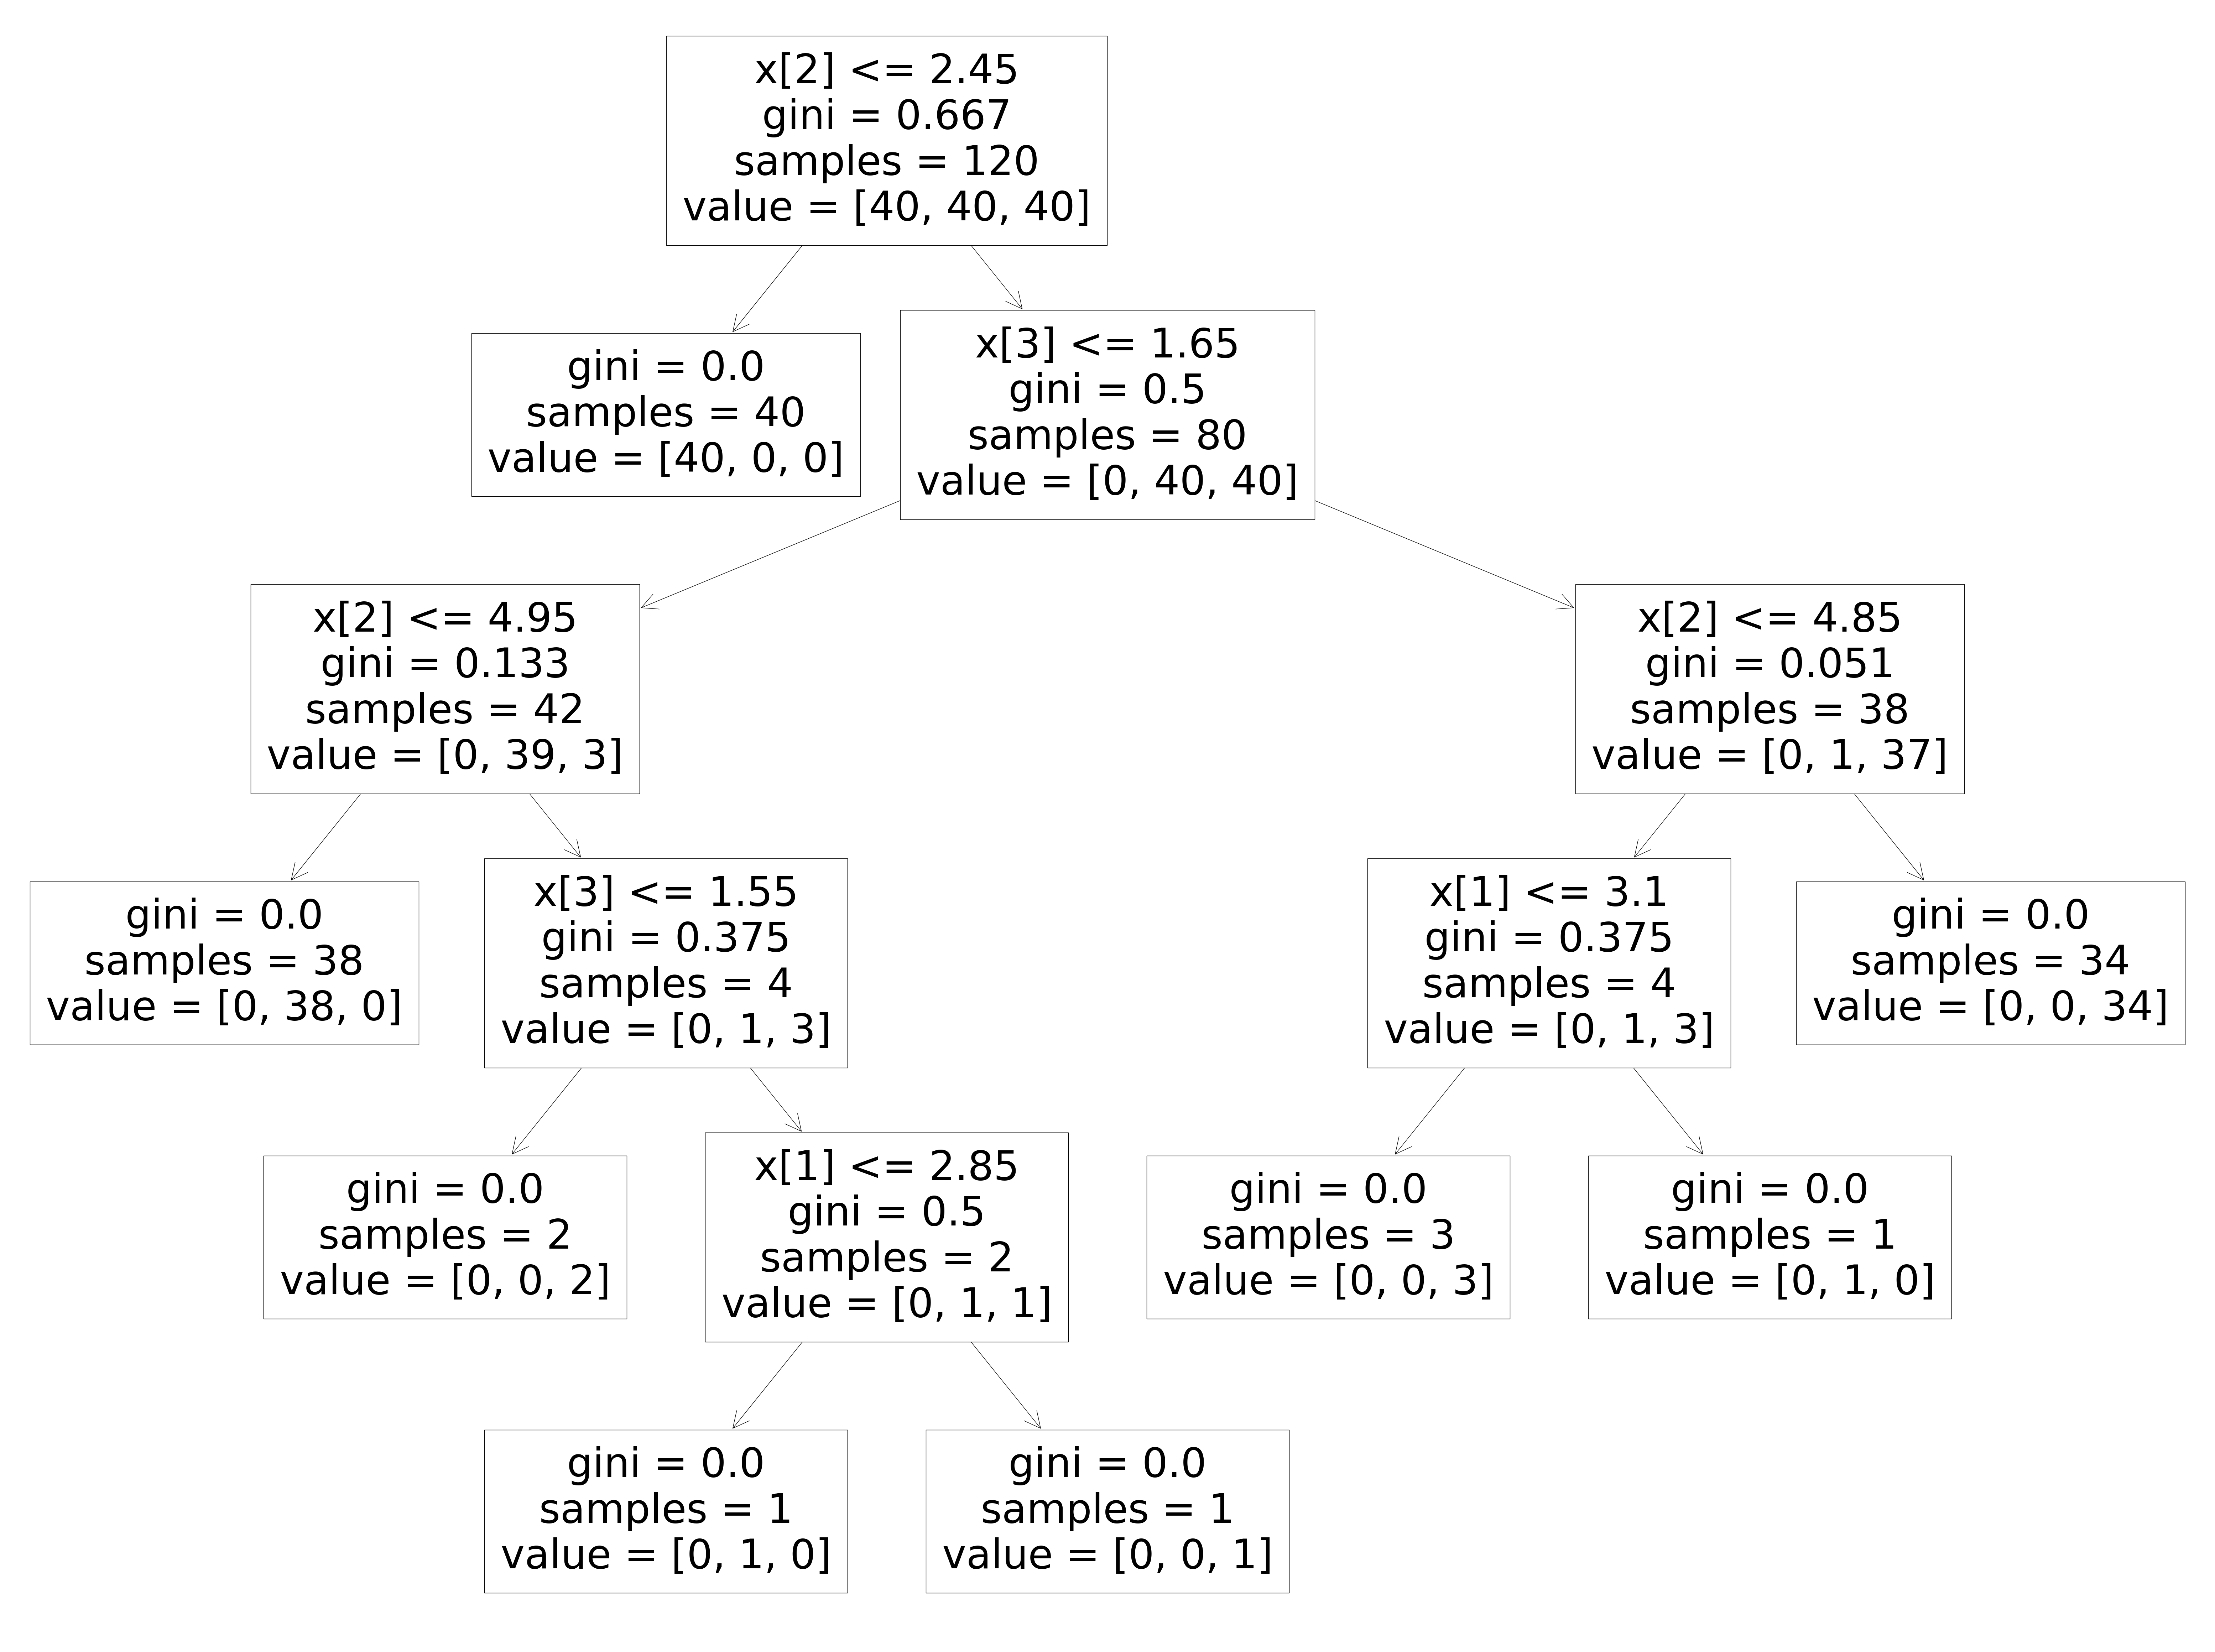

In [20]:
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 80,60

plot_tree(model)

In [21]:
import numpy as np 
import pandas as pd

In [22]:
data = pd.read_csv('Social_Network_Ads.csv')

In [23]:
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [25]:
data['Gender'].replace({'Male': 1, 'Female': 0}, inplace = True)

In [27]:
 X = data.iloc[:,1:4].values

In [29]:
y = data.iloc[:,-1].values

In [43]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [44]:
X = scaler.fit_transform(X)

In [53]:
X

array([[ 1.02020406, -1.78179743, -1.49004624],
       [ 1.02020406, -0.25358736, -1.46068138],
       [-0.98019606, -1.11320552, -0.78528968],
       ...,
       [-0.98019606,  1.17910958, -1.46068138],
       [ 1.02020406, -0.15807423, -1.07893824],
       [-0.98019606,  1.08359645, -0.99084367]])

In [47]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2)

In [60]:
model1  = DecisionTreeClassifier()

In [61]:
model1.fit(X_train,y_train)

DecisionTreeClassifier()

In [62]:
predict1 = model1.predict(X_test)

In [63]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,predict1)

0.7375

In [64]:
# from matplotlib.pylab import rcParams
# rcParams['figure.figsize'] = 80,60

# plot_tree(model1)

## Hyper-parameter Tuning using GridSearchCV 

In [65]:
param_dist = {
    
    'criterion' : ['gini' , 'entropy'],
    'max_depth' : [1, 2, 3, 4, 5, None]
}

In [66]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(model1, param_grid=param_dist, cv= 10, n_jobs = -1)

In [67]:
grid.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, None]})

In [68]:
grid.best_estimator_

DecisionTreeClassifier(max_depth=3)

In [71]:
grid.best_params_

{'criterion': 'gini', 'max_depth': 3}

In [72]:
grid.best_score_

0.909375

## Numeric Data

In [76]:
import pandas as pd 

import numpy as np 
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import r2_score

from sklearn.model_selection import GridSearchCV

In [79]:
df = pd.read_csv('Boston.csv')

In [80]:
df

,CRIM,ZN,INDUS,CHAS,NX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


In [81]:
X = df.iloc[:, 0:13]
y = df.iloc[:,-1] 

In [83]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)


In [99]:
model = DecisionTreeRegressor(criterion='squared_error', max_depth=6)

In [100]:
model.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=6)

In [101]:
y_pred = model.predict(X_test)

In [102]:
r2_score(y_test, y_pred)

0.8726770645002988

In [104]:
param_grid = {
    'max_depth':[2,4,8,10,None],
    'criterion': ['friedman_mse', 'absolute_error', 'squared_error', 'poisson'],
    'max_features':[0.25,0.5,1.0],
    'min_samples_split':[0.25,0.5,1.0]
}

In [105]:
reg = GridSearchCV(DecisionTreeRegressor(),param_grid=param_grid)

In [106]:
reg.fit(X_train,y_train)

GridSearchCV(estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['friedman_mse', 'absolute_error',
                                       'squared_error', 'poisson'],
                         'max_depth': [2, 4, 8, 10, None],
                         'max_features': [0.25, 0.5, 1.0],
                         'min_samples_split': [0.25, 0.5, 1.0]})

In [107]:
reg.best_score_

0.7599374457495985

In [108]:
reg.best_params_

{'criterion': 'poisson',
 'max_depth': 4,
 'max_features': 1.0,
 'min_samples_split': 0.25}

## Feature Importance

In [110]:
for importance, name in sorted(zip(model.feature_importances_, X_train.columns),reverse=True):
  print (name, importance)

LSTAT 0.5625703407272655
RM 0.2513117672593385
DIS 0.08878956162980126
NX 0.028366345538332297
PTRATIO 0.02553654075090026
CRIM 0.017104928439651165
TAX 0.007945475174349308
INDUS 0.0068193770326307745
B 0.006771710224111384
AGE 0.0038726801582100335
RAD 0.0009112730654095463
ZN 0.0
CHAS 0.0


In [112]:
import graphviz.backend as be

In [113]:
from sklearn.datasets import *
from dtreeviz.trees import *
from IPython.display import Image, display_svg, SVG

In [114]:
model = tree.DecisionTreeClassifier()

In [115]:
iris = load_iris()

In [116]:
X_train = iris.data

In [117]:
y_train = iris.target

In [118]:
model.fit(X_train, y_train)

DecisionTreeClassifier()

[Text(0.5, 0.9166666666666666, 'x[2] <= 2.45\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(0.4230769230769231, 0.75, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(0.5769230769230769, 0.75, 'x[3] <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(0.3076923076923077, 0.5833333333333334, 'x[2] <= 4.95\ngini = 0.168\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(0.15384615384615385, 0.4166666666666667, 'x[3] <= 1.65\ngini = 0.041\nsamples = 48\nvalue = [0, 47, 1]'),
 Text(0.07692307692307693, 0.25, 'gini = 0.0\nsamples = 47\nvalue = [0, 47, 0]'),
 Text(0.23076923076923078, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.46153846153846156, 0.4166666666666667, 'x[3] <= 1.55\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(0.38461538461538464, 0.25, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(0.5384615384615384, 0.25, 'x[2] <= 5.45\ngini = 0.444\nsamples = 3\nvalue = [0, 2, 1]'),
 Text(0.46153846153846156, 0.08333333333333333, 'gini

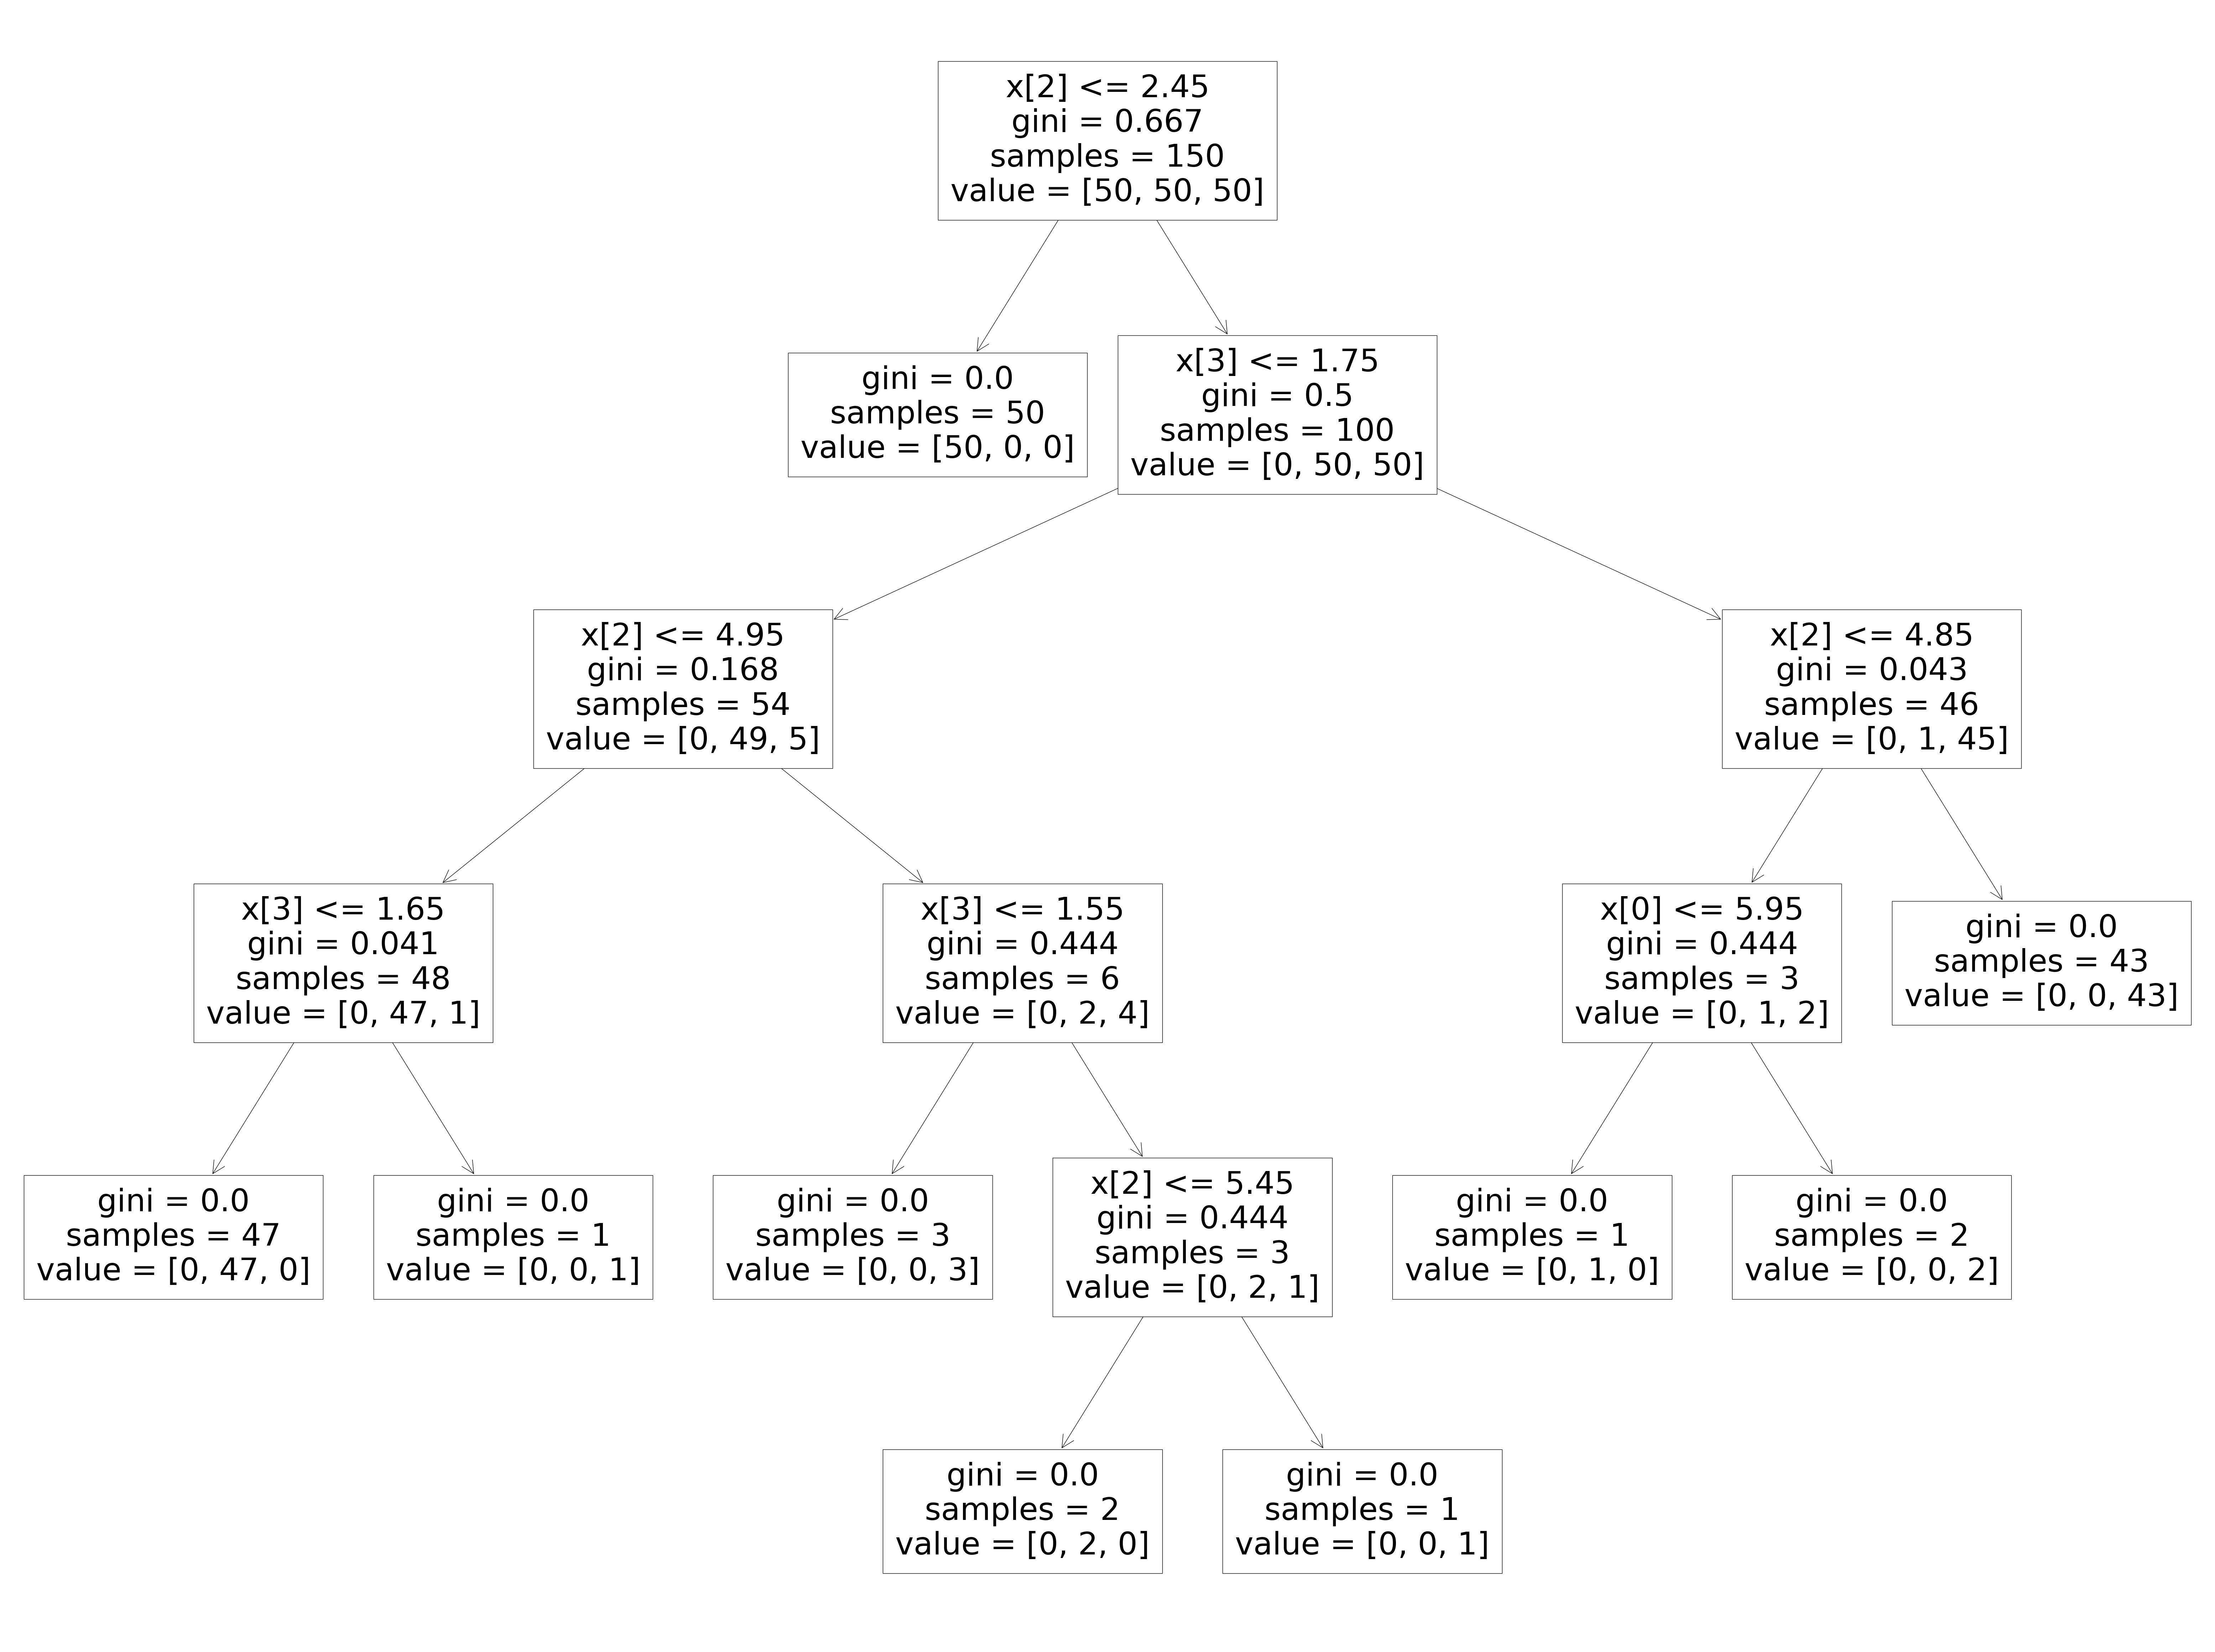

In [120]:
from sklearn.tree import plot_tree
plot_tree(model)